# Imports

In [22]:
from collections import Counter
import seaborn as sns
import numpy as np
import json
import re
import glob

In [23]:
def get_imports_from_source_string(src):
    regex = r"(?m)^(?:from[ ]+(\S+)[ ]+)?import[ ]+(\S+)(?:[ ]+as[ ]+\S+)?[ ]*$"
    pattern = re.compile(regex)
    
    modules = []
    
    for match in re.findall(pattern, src):
        for module in match:
            if module != "":
                modules.append(module)
    
    return modules


data = {}


for file in glob.glob("./data/python/*.ipynb"):
    nb_name = file.split("/")[-1]
    imports = []
    
    with open(file, "r") as notebook:
        nb = json.load(notebook)
    
    for cell in nb["cells"]:
        if cell['cell_type'] == 'code':
            source_string = "\n".join(cell["source"])
            modules = get_imports_from_source_string(source_string)
            imports.extend(modules)
    
    nb = {
        'name': nb_name,
        'imports': imports
    }
    
    data[nb_name] = nb
    
for file in glob.glob("./data/python/*.py"):
    nb_name = file.split("/")[-1]
    imports = []
    
    with open(file, "r") as fp:
        source = fp.readlines()

    source_string = "\n".join(source)
    imports = get_imports_from_source_string(source_string)
    
    nb = {
        'name': nb_name,
        'imports': imports
    }
    
    data[nb_name] = nb

In [24]:
c_imports = Counter()

for kernel, v in data.items():
    imports = v['imports']
    c_imports.update(imports)

In [25]:
common_imports = dict(c_imports.most_common(20))
imports, freqs = zip(*common_imports.items())

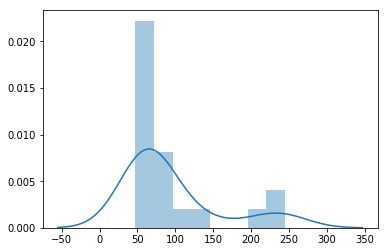

In [29]:
sns.distplot(freqs, label=imports)